# Clustering Assignment

**Problem statement:**
- HELP International is an international humanitarian NGO which has raised around $ 10 million. The NGO is committed to spend this amount in fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
- We should categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


**Objectives**

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT.  The following approach is suggested :

- Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.

- **Outlier Analysis**: You must perform the Outlier Analysis on the dataset. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.
- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]
- Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.
- Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure you create visualisations for all the three pairs. You can also choose other types of plots like boxplots, etc. 
- Both K-means and Hierarchical may give different results because of previous analysis (whether you chose to keep or remove the outliers, how many clusters you chose,  etc.) Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

## 1. Importing Dataset

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

%matplotlib inline

In [3]:
# Load data from .csv file

coun = pd.read_csv('Country-data.csv')
coun.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## 2. Data Understanding

In [4]:
# Shape of dataset

coun.shape

(167, 10)

In [5]:
# Chccking for null values

coun.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# Statistics summary of data set

coun.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Info of data

coun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


From Data dictionary, it is clear that ``exports, health`` and ``imports`` were given as percenatges of ``gdpp``. Lets convert them into actual numbers.

In [8]:
# Method to convert percenatges into actual numbers

def convertToActualNumber(column):
    coun[column] = round(coun['gdpp']*coun[column]/100, 2)

In [9]:
# Converting exports, health and imports into actual numbers

convertToActualNumber('exports')
convertToActualNumber('health')
convertToActualNumber('imports')

In [10]:
# Inspecting the dataset

coun.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


## 3. Visualizing the data (EDA)

In [11]:
# dropping country

coun_without_country = coun.drop(columns=['country'])
coun_without_country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


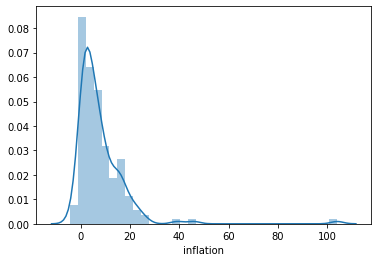

In [12]:
# distribution plot of inflation variable

sns.distplot(coun_without_country['inflation'])

From above plot, ``inflation`` variable is almost normally distributed as most of the data is concentrated between 0 and 20. The plot also says that annual growth rate of the Total GDP for most of the countries would be in range 0 to 10.

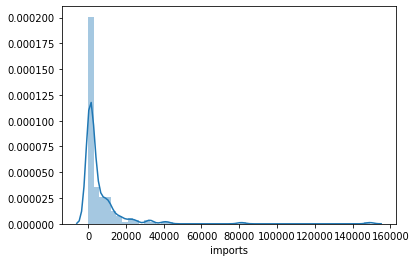

In [13]:
# distribution plot of imports variable

sns.distplot(coun_without_country['imports'])

From above plot, ``imports`` columns is also normally distributted as the data is highly concentrated in range 0 to 20000.

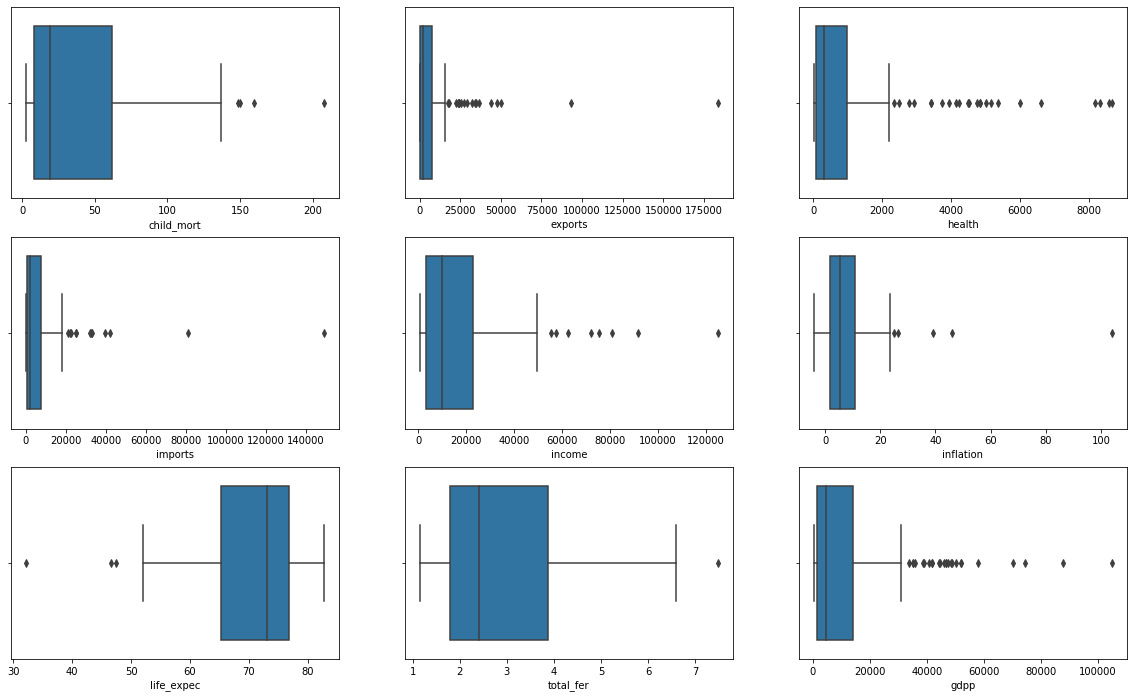

In [14]:
# Box plots of all numeric variables

plt.figure(figsize=(20,12))

for i in range(len(coun_without_country.columns)):
    plt.subplot(3,3, i+1)
    sns.boxplot(coun_without_country[coun_without_country.columns[i]])

``exports, health, imports, income, inflation`` and ``gdpp`` have extreme values on higher side, where as ``life_expec`` had an extreme value on the lower side. ``child_mort`` and ``total_fer`` have some outliers but they are not extreme values. Hence, they are acceptable.

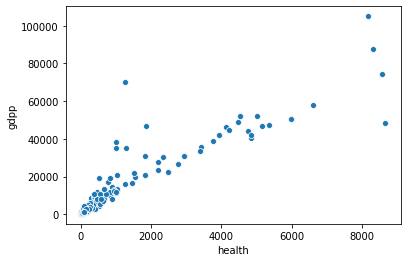

In [15]:
# Scatter plot of health and gdpp

sns.scatterplot('health', 'gdpp', data = coun_without_country)

As we can see from the scatter plot, amount spent on ``health`` is relatively high for countries with high ``gdpp`` than the countries with low gdpp.

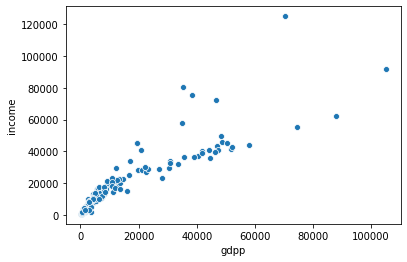

In [16]:
# Scatter plot of gdpp and income

sns.scatterplot('gdpp', 'income', data = coun_without_country)

From above scatter plot, net income per person is high for countries with high ``gdpp``.

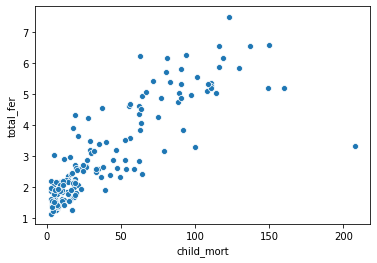

In [17]:
# Scatter plot of child_mort and total_fer

sns.scatterplot('child_mort', 'total_fer', data = coun_without_country)

From above plot, ``child_mort`` and ``total_fer`` are highly correlated. Deaths of children are increasing with increase in fertility rate.

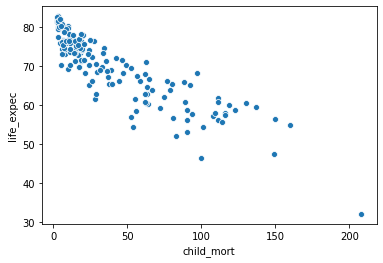

In [18]:
# Scatter plot of child_mort and life_expec

sns.scatterplot('child_mort', 'life_expec', data = coun_without_country)

From above plot, ``life_expec`` for a new born is low for the countries with high ``child_mort``.

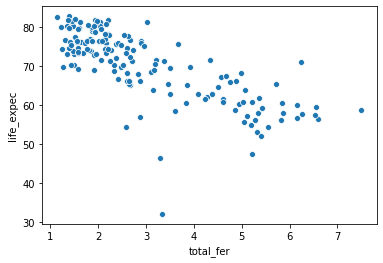

In [19]:
# Scatter plot of total_fer and life_expec

sns.scatterplot('total_fer', 'life_expec', data = coun_without_country)

From above plot, increase in ``total_fer`` leads to lower ``life_expec`` because higher ``total_fer`` leads to higher ``child_mort`` which inturn is causing lower ``life_expec``.

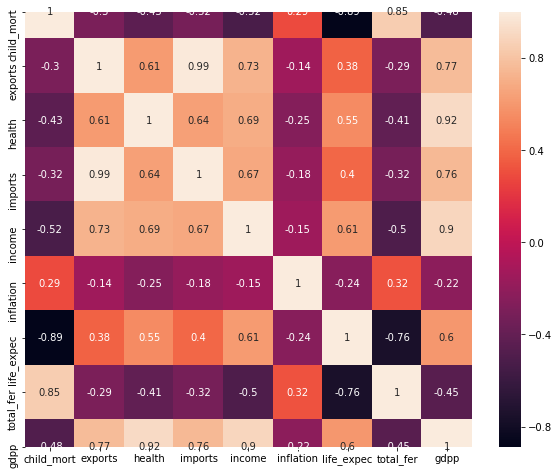

In [20]:
# heat map of all numeric variables

plt.figure(figsize=(10,8))

sns.heatmap(coun_without_country.corr(), annot=True)

From above heatmap, ``exports, health, imports`` and ``income`` are highly correlated with ``gdpp``.

## 4. Data Preparation

#### Treating Outliers

In [21]:
# Method to treat outliers using capping

def cap_outliers(col):
    if col in ['exports', 'health', 'imports', 'income', 'gdpp']:
        v = 0.97
    else:
        v = 0.99
    LQ = coun_without_country[col].quantile(0.01)
    UQ = coun_without_country[col].quantile(v)
    coun_without_country[col][coun_without_country[col] < LQ] = LQ
    coun_without_country[col][coun_without_country[col] > UQ] = UQ

In [22]:
# Capping the outliers

for i in coun_without_country.columns:
    cap_outliers(i)

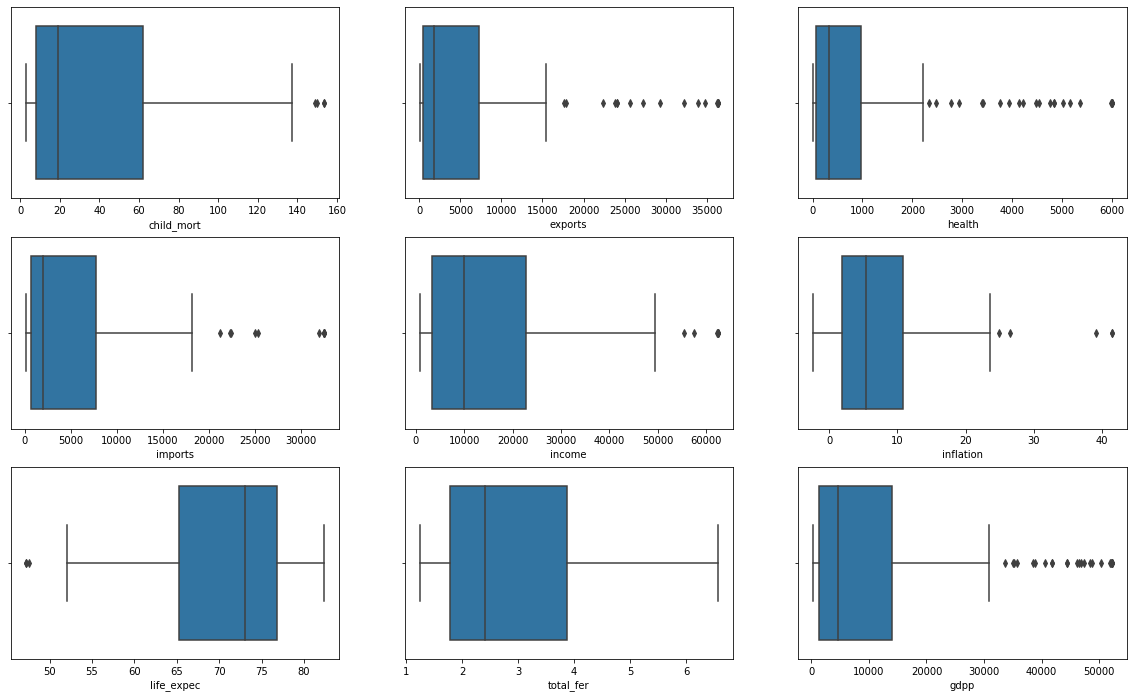

In [23]:
# Box plots of all numeric variables after capping outliers

plt.figure(figsize=(20,12))

for i in range(len(coun_without_country.columns)):
    plt.subplot(3,3, i+1)
    sns.boxplot(coun_without_country[coun_without_country.columns[i]])

After treating outliers, boxplots are more readable. Except for ``imports`` and ``inflation``, outliers for all variables are almost continuous.

#### Hopkins check

In [24]:
# Method to calculate Hopkins score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
# Hopkins score

round(hopkins(coun_without_country),2)

0.89

Hopkins score for our data set is high. Hence, it has high tendency to cluster.

#### Scaling

In [26]:
# Scaling the data

scaler = StandardScaler()
coun_scaled = scaler.fit_transform(coun_without_country)

coun_scaled = pd.DataFrame(data=coun_scaled, columns=coun_without_country.columns)
coun_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.643716,-0.606990,-0.672914,-0.905721,0.263649,-1.693799,1.926928,-0.748270
1,-0.547543,-0.525751,-0.463043,-0.449825,-0.394646,-0.375251,0.663053,-0.865911,-0.520225
2,-0.272548,-0.464335,-0.515225,-0.525148,-0.212207,1.123260,0.686504,-0.035427,-0.496370
3,2.084186,-0.411673,-0.569612,-0.510536,-0.642198,1.936405,-1.236499,2.154642,-0.556331
4,-0.709457,-0.048891,-0.165082,0.216845,0.168642,-0.768917,0.721681,-0.544433,0.002660


In [27]:
# Statistics summary of scaled data

coun_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-5.717316e-17,8.775416e-17,-7.911170e-17,-5.916757e-17,7.046925e-17,-1.548994e-16,1.598189e-15,1.622122e-16,1.090279e-16
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-9.022102e-01,-6.472940e-01,-6.228587e-01,-6.913042e-01,-9.590248e-01,-1.257940e+00,-2.753796e+00,-1.138364e+00,-7.625436e-01
25%,-7.621425e-01,-6.013058e-01,-5.836669e-01,-6.226496e-01,-7.985301e-01,-7.211609e-01,-6.267666e-01,-7.687982e-01,-6.981739e-01
50%,-4.781521e-01,-4.573210e-01,-4.286512e-01,-4.424064e-01,-3.928029e-01,-2.590877e-01,2.878326e-01,-3.569046e-01,-4.834749e-01
75%,6.218286e-01,1.380309e-01,-1.138837e-02,2.853072e-01,3.959232e-01,4.327313e-01,7.216810e-01,6.276215e-01,1.219375e-01
max,2.968283e+00,3.286539e+00,3.187140e+00,3.464439e+00,2.834340e+00,4.398816e+00,1.374799e+00,2.424951e+00,2.582788e+00


## 5. K-Means clustering

### Finding optimal number of clusters

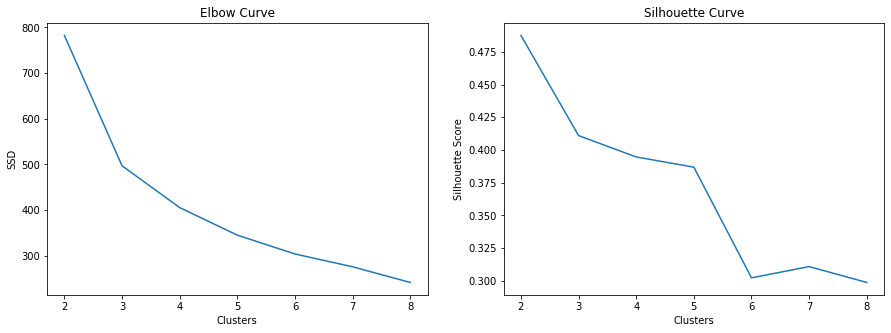

In [28]:
# Optimal k value

n_clusters = [2,3,4,5,6,7,8]
ssd = []
sil_score = []
for i in n_clusters:
    kmeans = KMeans(i)
    kmeans.fit(coun_scaled)
    
    ssd.append(kmeans.inertia_)
    sil_score.append(silhouette_score(coun_scaled, kmeans.labels_))
    
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Elbow Curve")
plt.xlabel("Clusters")
plt.ylabel("SSD")
plt.plot(n_clusters, ssd)

plt.subplot(1,2,2)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Curve")
plt.plot(n_clusters, sil_score)

From Elbow curve optimal K value is 3 and from Silhouette curve optimal K value is 2. But clustering with K=2 does not give any significant insights. So lets proceed with K=3. 

In [29]:
# Model with K=3

kmeans = KMeans(3)
kmeans.fit(coun_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
# Assign the labels to dataset which has country variable

coun['K_labels'] = kmeans.labels_
coun.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2


In [31]:
# # Countries in each cluster

coun['K_labels'].value_counts()

2    83
0    48
1    36
Name: K_labels, dtype: int64

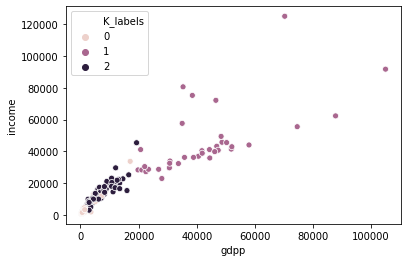

In [32]:
# Visualize the clusters gdpp vs income

sns.scatterplot('gdpp', 'income', data = coun, hue='K_labels')

From above plot, we can say that ``income`` is high for countries with high ``gdpp``.

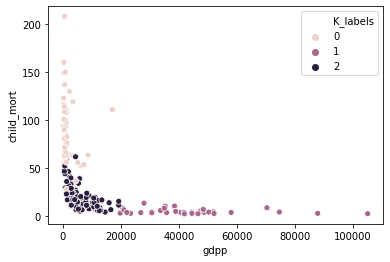

In [33]:
# Visualize the clusters gdpp vs child_mort

sns.scatterplot('gdpp', 'child_mort', data = coun, hue='K_labels')

From above plot, ``child_mort`` is high for countries with low ``gdpp`` because they are not spending enough money on Health due to their economic situation.

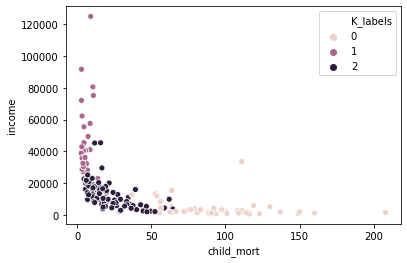

In [34]:
# Visualize the clusters child_mort vs income

sns.scatterplot('child_mort', 'income', data = coun, hue='K_labels')

From above plot, ``child_mort`` is high for countries with low ``income`` as ``income`` and ``gdpp`` are strongly correlated. Low income means low gdpp which means low spendings on health.

We are doing cluester profiling on ``gdpp, child_mort`` and ``income`` columns. So we can use any dataset prior to scaling because scaling will change the values of these 3 variables.

In [35]:
# Cluster profiling using coun data set

cp_K = round(coun.groupby('K_labels')['gdpp', 'child_mort', 'income'].mean(),2)
cp_K

,gdpp,child_mort,income
K_labels,,,
0,1909.21,91.61,3897.35
1,42811.11,5.19,45608.33
2,6411.71,21.77,12460.12


In [36]:
# Method to find the target_label

def get_targetLable(cp):
    for i in range(len(cp.index)):
        if cp.iloc[i][0] == min(cp['gdpp']) and cp.iloc[i][1] == max(cp['child_mort']) and cp.iloc[i][2] == min(cp['income']):
            return i

In [37]:
# Target label for K-Means clustering

target_label_K = get_targetLable(cp_K)
print('From above tabel, for cluster {} "gdpp" and "income" are low and "child_mort is high"'.format(target_label_K))

From above tabel, for cluster 0 "gdpp" and "income" are low and "child_mort is high"


In [38]:
# Method for Bar plots of gdpp, income and child_mort aggregate values for all clusters

def bar_plot_cp(cp):
    
    plt.figure(figsize=(15,5))

    for i in range(len(cp.columns)):
        plt.subplot(1,3,i+1)
        plt.title(cp.columns[i])
        cp[cp.columns[i]].plot(kind='bar')

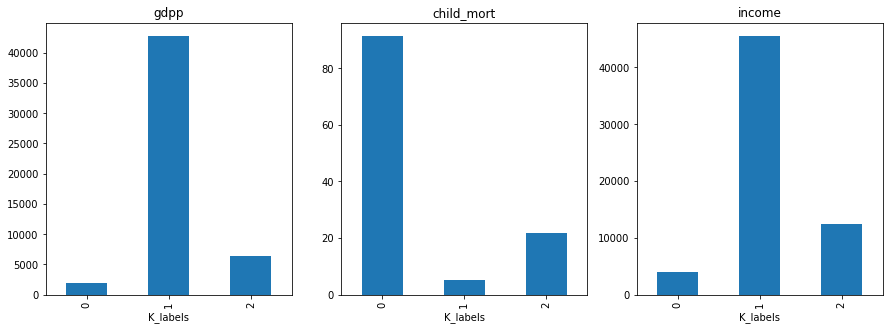

In [39]:
# Bar plots of gdpp, income and child_mort

bar_plot_cp(cp_K)

In [40]:
# 5 countires that are in direst need of aid

target_cluster_K = coun[coun['K_labels']==target_label_K].sort_values(by=['gdpp', 'child_mort','income'], ascending=[True, False, True]).head()
target_cluster_K

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_labels
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,0


From K-Means clustering, above 5 countries are in direst need of HELP organization's aid.

## 6. Hierarchical clustering

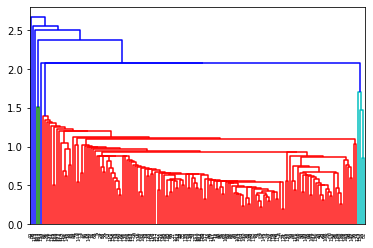

In [41]:
# Using Single linkage

mergings_S = linkage(coun_scaled, method='single')
dendrogram(mergings_S)
plt.show()

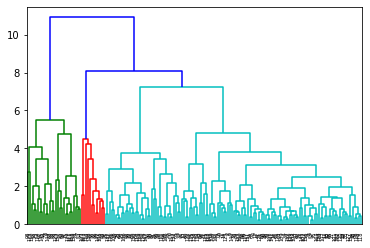

In [42]:
# Using Complete linkage

mergings_C = linkage(coun_scaled, method='complete')
dendrogram(mergings_C)
plt.show()

Dendrogram of Complete linkage is bit readable when compared with dendrogram of Single linkage.

In [43]:
# Segment with K=3 and assign labels to data frame with country variable

coun['H_labels'] = cut_tree(mergings_C, 3).reshape(-1,)

In [44]:
# Inspecting the dataframa

coun.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_labels,H_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2,0


In [45]:
# Countries in each cluster

coun['H_labels'].value_counts()

0    128
1     27
2     12
Name: H_labels, dtype: int64

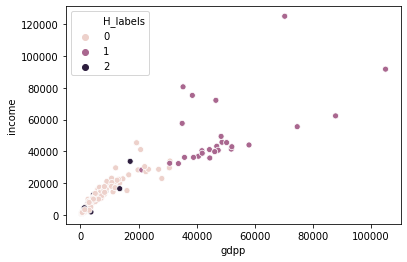

In [46]:
# Visualize the clusters gdpp vs income

sns.scatterplot('gdpp', 'income', data = coun, hue='H_labels')

From above plot, we can say that ``income`` is high for countries with high ``gdpp``.

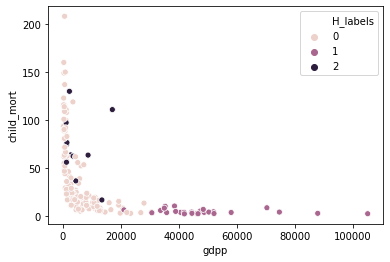

In [47]:
# Visualize the clusters gdpp vs child_mort

sns.scatterplot('gdpp', 'child_mort', data = coun, hue='H_labels')

From above plot, ``child_mort`` is high for countries with low ``gdpp`` because they are not spending enough money on Health due to their economic situation.

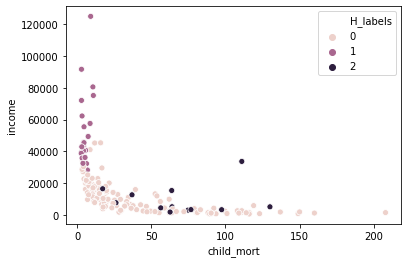

In [48]:
# Visualize the clusters child_mort vs income

sns.scatterplot('child_mort', 'income', data = coun, hue='H_labels')

From above plot, ``child_mort`` is high for countries with low ``income`` as ``income`` and ``gdpp`` are strongly correlated. Low income means low gdpp which means low spendings on health.

We are doing cluester profiling on ``gdpp, child_mort`` and ``income`` columns. So we can use any dataset prior to scaling because scaling with change the values of these 3 variables.

In [49]:
# Cluster profiling using coun data set

cp_H = round(coun.groupby('H_labels')['gdpp', 'child_mort', 'income'].mean(), 2)
cp_H

,gdpp,child_mort,income
H_labels,,,
0,6157.38,42.48,10778.38
1,48755.56,5.10,50781.48
2,5039.17,68.03,9369.17


In [50]:
# Find the target_label

target_label_H = get_targetLable(cp_H)
print('From above tabel, for cluster {} "gdpp" and "income" are low and "child_mort is high"'.format(target_label_H))

From above tabel, for cluster 2 "gdpp" and "income" are low and "child_mort is high"


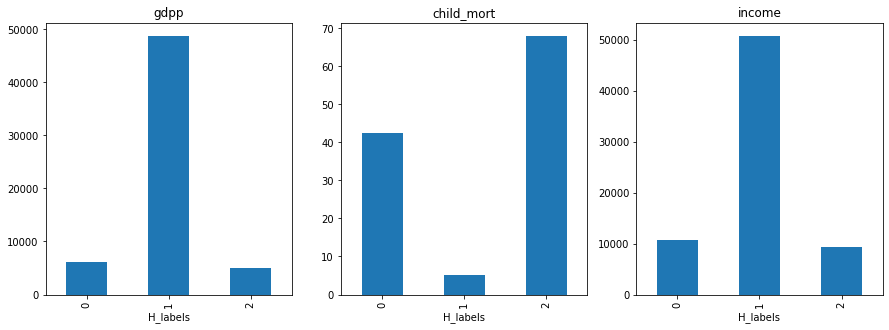

In [51]:
# Bar plots of gdpp, income and child_mort aggregate values for all clusters

bar_plot_cp(cp_H)

In [52]:
# 5 countires that are in direst need of aid

target_cluster_H = coun[coun['H_labels']==target_label_H].sort_values(by=['gdpp', 'child_mort','income'], ascending=[True, False, True]).head()
target_cluster_H

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_labels,H_labels
99,Mauritania,97.4,608.40,52.92,734.40,3320,18.9,68.2,4.98,1200,0,2
59,Ghana,74.7,386.45,68.38,601.29,3060,16.6,62.2,4.27,1310,0,2
165,Yemen,56.3,393.00,67.86,450.64,4480,23.6,67.5,4.67,1310,0,2
142,Sudan,76.7,291.56,93.54,254.56,3370,19.6,66.3,4.88,1480,0,2
113,Nigeria,130.0,589.49,118.13,405.42,5150,104.0,60.5,5.84,2330,0,2


From Hierarchical clustering, above 5 countries are in direst need of HELP organization's aid.